In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PySparkShell") \
    .getOrCreate()

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import lit

In [4]:
import pandas as pd

In [5]:
import plotly.graph_objects as go

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
CoronaBeerDateForInvestigation = spark.read.csv('Still_Date.csv',inferSchema=True, header=True)
CoronaBeerDateForInvestigation=CoronaBeerDateForInvestigation.orderBy("Date", ascending=False)
CoronaBeerDateForInvestigation.createOrReplaceTempView("DateStiller")
CoronaBeerDateForInvestigation=spark\
.sql(\
     "SELECT Date as Stallen \
     FROM DateStiller")
CoronaBeerDateForInvestigation.createOrReplaceTempView("DateStiller")

In [9]:
BeerCountries = spark.read.csv('covid19',inferSchema=True, header=True)


In [10]:
BeerCountries.createOrReplaceTempView("Countries")
BeerCountries=spark\
.sql(\
     "SELECT * \
     FROM Countries \
     Where location='Mexico' OR location= 'Denmark' Or location='Ireland' Or location='Netherlands'")


BeerCountries.createOrReplaceTempView("Countries")
BeerCountries=spark\
.sql(\
     "SELECT location, date, total_cases, total_deaths\
     FROM Countries,DateStiller \
     Where date = Stallen")

In [11]:
BeerCountries.createOrReplaceTempView("Countries")
MexicoCasesPM=spark\
.sql(\
     "SELECT location, date, total_cases \
     FROM Countries \
     Where location='Mexico'")
MexicoDeathPM=spark\
.sql(\
     "SELECT location, date, total_deaths \
     FROM Countries \
     Where location='Mexico' ")

In [12]:
DenmarkCasesPM=spark\
.sql(\
     "SELECT location, date, total_cases \
     FROM Countries \
     Where location='Denmark'")
DenmarkDeathPM=spark\
.sql(\
     "SELECT location, date, total_deaths \
     FROM Countries \
     Where location='Denmark' ")

In [13]:
NetherlandsCasesPM=spark\
.sql(\
     "SELECT location, date, total_cases \
     FROM Countries \
     Where location='Netherlands'")
NetherlandsDeathPM=spark\
.sql(\
     "SELECT location, date, total_deaths \
     FROM Countries \
     Where location='Netherlands' ")

In [14]:
IrelandCasesPM=spark\
.sql(\
     "SELECT location, date, total_cases \
     FROM Countries \
     Where location='Ireland'")
IrelandDeathPM=spark\
.sql(\
     "SELECT location, date, total_deaths \
     FROM Countries \
     Where location='Ireland' ")

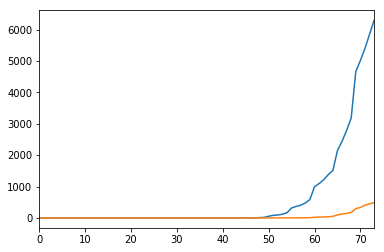

In [15]:

pandas_MexicoCasesPM = MexicoCasesPM.select("*").toPandas()
pandas_MexicoCasesPM['total_cases'].plot()
pandas_MexicoDeathPM = MexicoDeathPM.select("*").toPandas()
pandas_MexicoDeathPM['total_deaths'].plot()


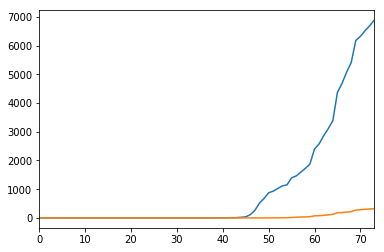

In [16]:

pandas_DenmarkCasesPM = DenmarkCasesPM.select("*").toPandas()
pandas_DenmarkCasesPM['total_cases'].plot()
pandas_DenmarkDeathPM = DenmarkDeathPM.select("*").toPandas()
pandas_DenmarkDeathPM['total_deaths'].plot()

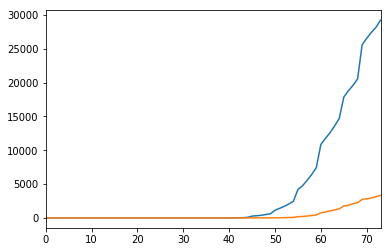

In [17]:

pandas_NetherlandsCasesPM = NetherlandsCasesPM.select("*").toPandas()
pandas_NetherlandsCasesPM['total_cases'].plot()
pandas_NetherlandsDeathPM =NetherlandsDeathPM.select("*").toPandas()
pandas_NetherlandsDeathPM['total_deaths'].plot()

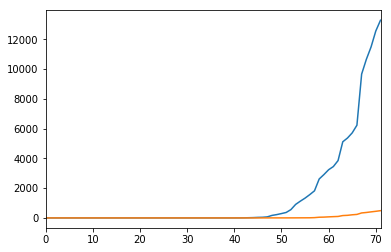

In [18]:

pandas_IrelandCasesPM = IrelandCasesPM.select("*").toPandas()
pandas_IrelandCasesPM['total_cases'].plot()
pandas_IrelandDeathPM =  IrelandDeathPM.select("*").toPandas()
pandas_IrelandDeathPM['total_deaths'].plot()